## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows", 1000,'display.max_columns', 1000)

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,plot_confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

## Exploratory data analysis

In [31]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### <font color = 'red'>There are no missing values present in our dataset

In [33]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [34]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [35]:
classes

0    284315
1       492
Name: Class, dtype: int64

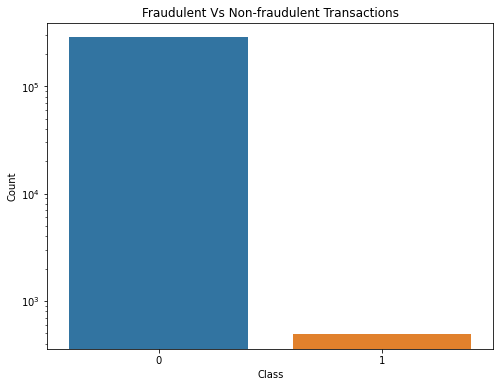

In [36]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8, 6))

sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),data=df)
plt.yscale('log')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent Vs Non-fraudulent Transactions')
plt.show()

#### <font color = 'red'> Above plot clearly shows class imbalance in our dataset

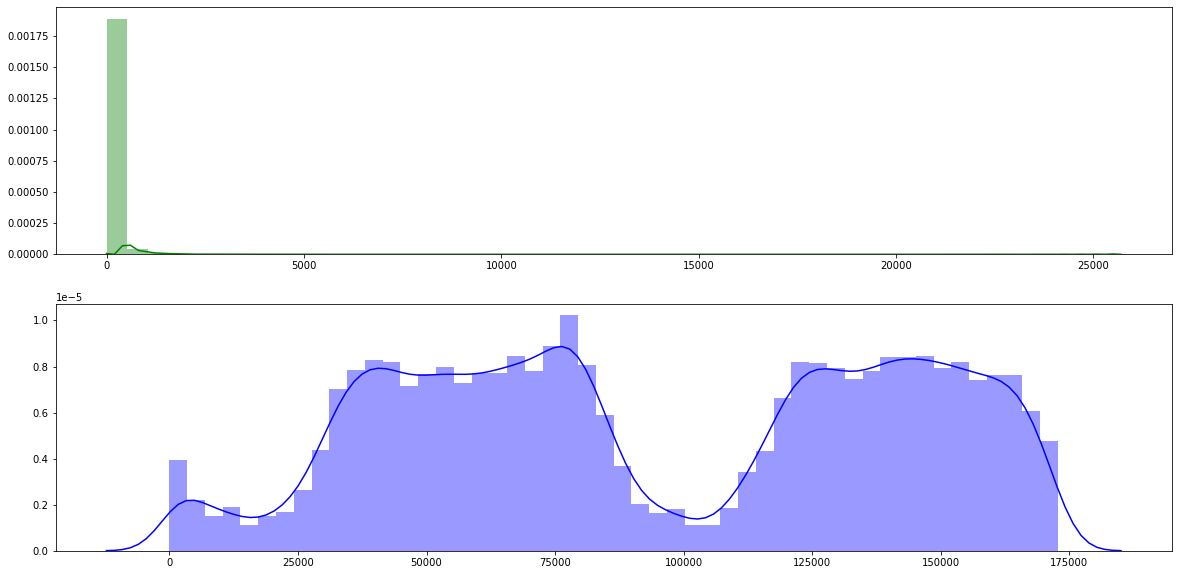

In [37]:
# Checking distribtion of Amount and Time seperately
fig, ax= plt.subplots(2,1, figsize=(20,10))

amount= df['Amount'].values
time= df['Time'].values

sns.distplot(amount,ax=ax[0], color='g')
sns.distplot(time,ax=ax[1],color='b')

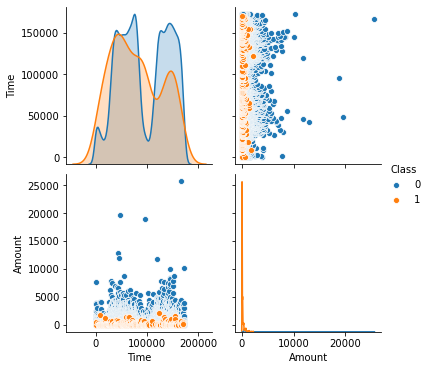

In [38]:
# Plotting pairplot of time and amount with class variable
sns.pairplot(df, vars=df[['Time','Amount']], kind='scatter',hue= 'Class')

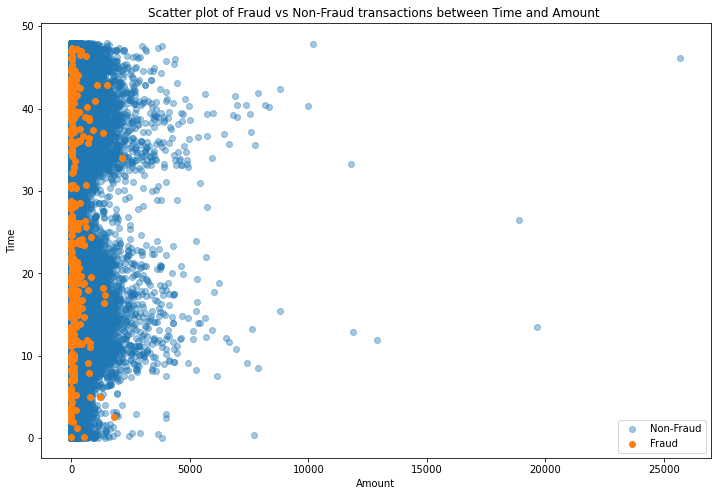

In [39]:
# Storing Fraud and non-Fraud transactions in different dataframe
df_fraud = df[df.Class == 1]
df_nonfraud = df[df.Class == 0]

# Lets look at distribution of classes with Time and Amount

fig = plt.figure(figsize = (12,8))
plt.scatter(df_nonfraud.Amount, df_nonfraud.Time.values/(60*60), alpha=0.4, label='Non-Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60), alpha=1, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.legend()
plt.title('Scatter plot of Fraud vs Non-Fraud transactions between Time and Amount ')
plt.show()

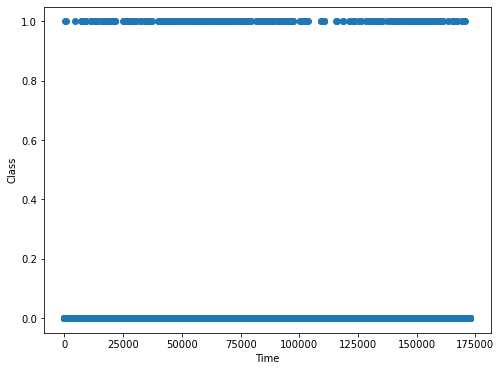

In [40]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(8, 6))
plt.scatter(df['Time'], df['Class'])
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()

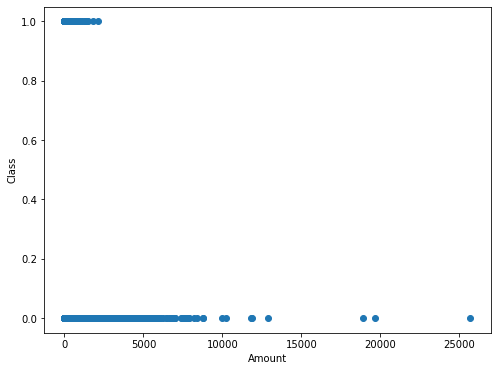

In [41]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(8, 6))
plt.scatter(df['Amount'], df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

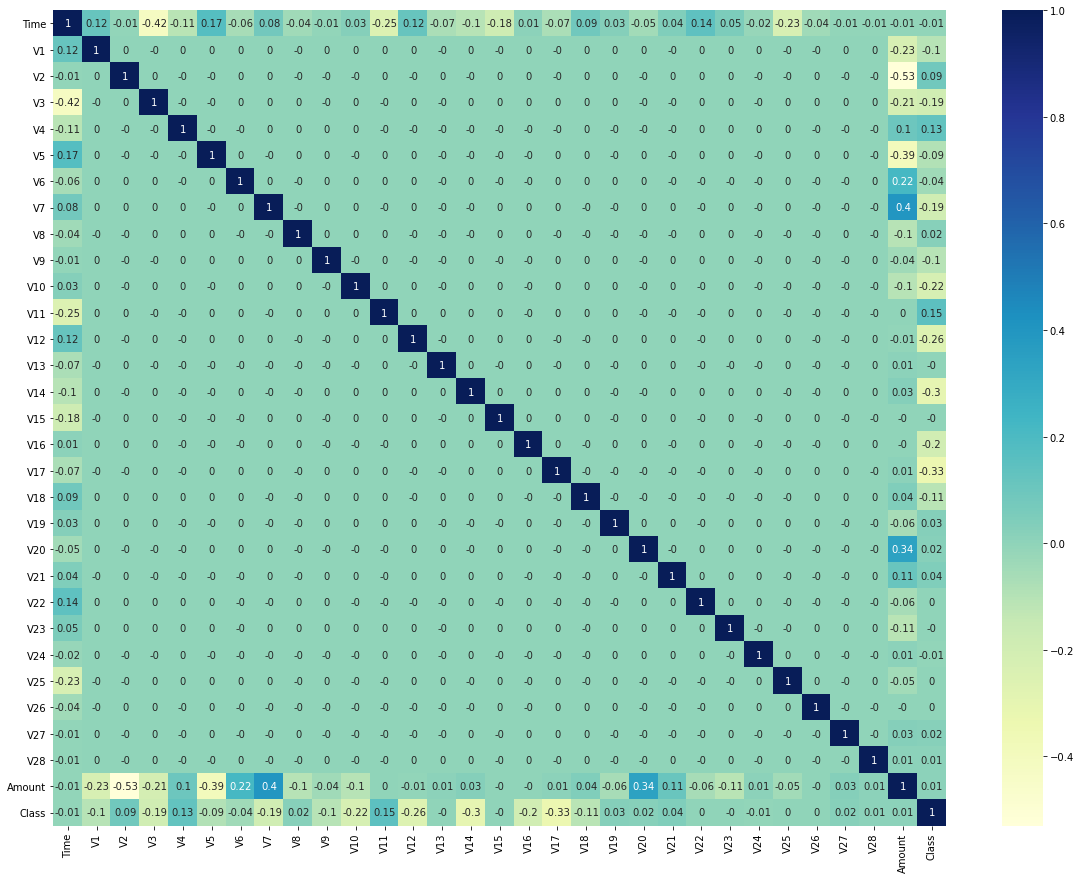

In [42]:
#lets check the correlations of all variables with the target
cor = df.corr()

# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(round(cor,2), cmap="YlGnBu", annot=True)
plt.show()

#### <font color = 'red'> Lets plot some box plots for variables which are somewhat correlated with class variable such as `V3,V4,V7,V10,V11,V12,V14,V16,V17`

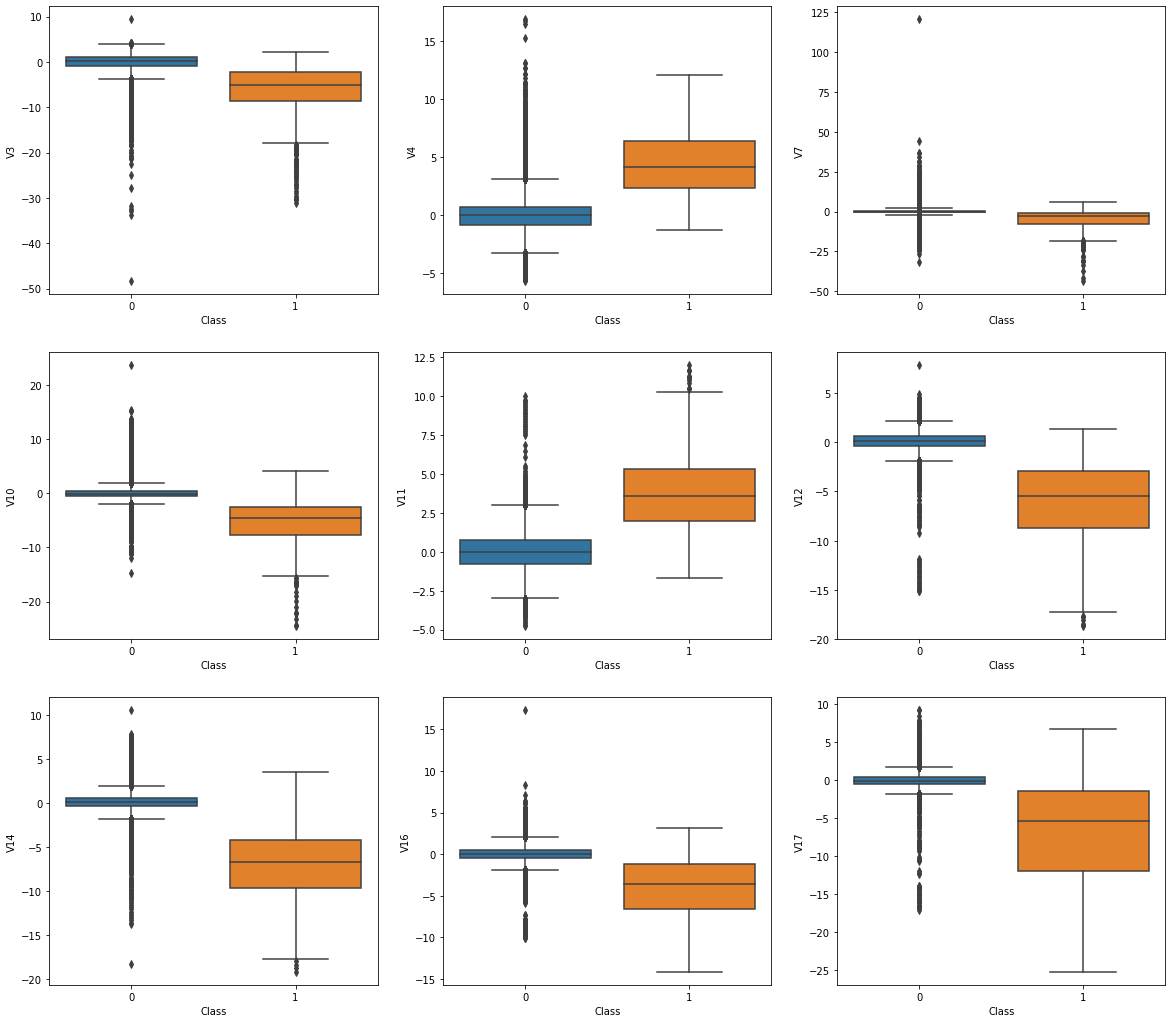

In [43]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'Class', y = 'V3', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Class', y = 'V4', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Class', y = 'V7', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Class', y = 'V10', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Class', y = 'V11', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Class', y = 'V12', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Class', y = 'V14', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Class', y = 'V16', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'Class', y = 'V17', data = df)
plt.show()

In [44]:
# Drop unnecessary columns

# Putting feature variable to X
X = df.drop(['Class','Time'],axis=1)


In [45]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### Splitting the data into train & test data

In [46]:
y= df['Class'] #class variable

In [47]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, test_size = 0.3, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [48]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

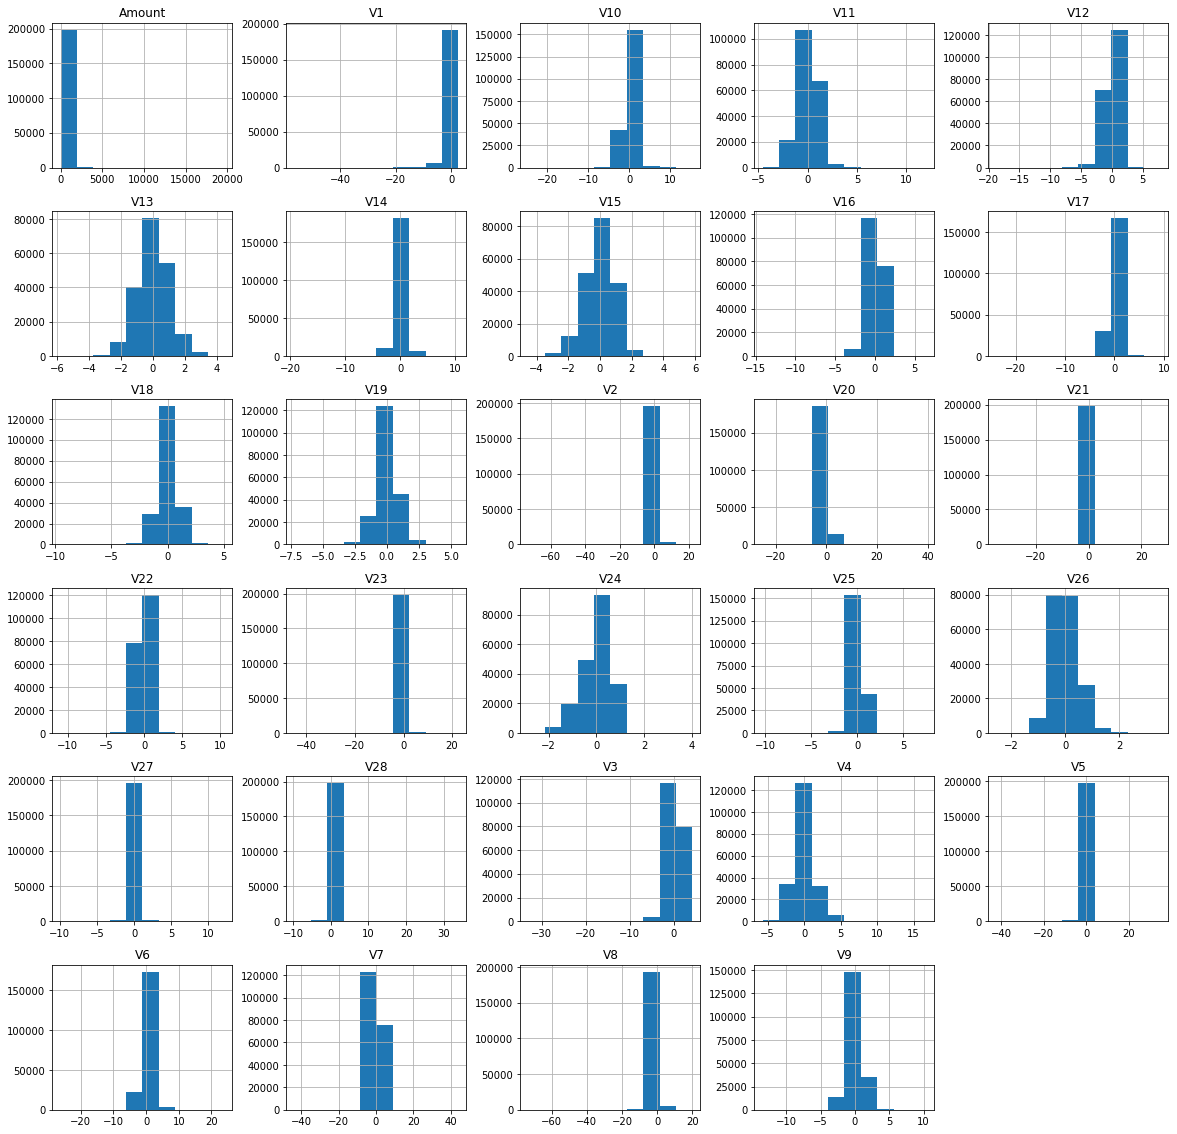

In [49]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize = (20, 20))
plt.show()

In [50]:
# let's check skewness in our data before using PowerTransformer
X_train.skew(axis = 0, skipna = True)

V1        -3.352780
V2        -4.743314
V3        -2.115044
V4         0.671234
V5        -0.335423
V6         1.213213
V7        -1.054441
V8        -9.048266
V9         0.524853
V10        1.046184
V11        0.337235
V12       -2.187217
V13        0.067930
V14       -1.913552
V15       -0.311223
V16       -1.057503
V17       -3.526079
V18       -0.248354
V19        0.116720
V20       -1.377751
V21        3.490872
V22       -0.218690
V23       -6.872356
V24       -0.540695
V25       -0.429101
V26        0.567342
V27       -2.175241
V28       13.803155
Amount    13.520470
dtype: float64

#### <font color = 'red'> Above results show that skewness in our data is not in between -2 to +2 which is acceptable limit. Hence we will use Power Transformer method.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [51]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer(copy=False)
pt.fit_transform(X_train)
pt.transform(X_test)

array([[-0.55395099,  0.91160093, -0.11928654, ..., -0.12977515,
         0.17955064,  0.90076267],
       [ 0.02609086,  1.26869257, -1.43424809, ...,  0.29394533,
        -0.17958052, -0.43072205],
       [ 1.44914779, -0.05637223, -0.93523866, ..., -0.05895154,
        -0.15948888, -0.40288819],
       ...,
       [ 0.40730679, -0.2662729 ,  0.14250171, ...,  0.07984482,
        -0.00433223,  0.40504099],
       [-1.78794338, -1.85749671,  1.25787403, ...,  2.06920383,
         0.27978279,  0.7051672 ],
       [-2.52591184,  4.32254435, -3.31579382, ..., -3.14361737,
         0.7478174 ,  0.81119126]])

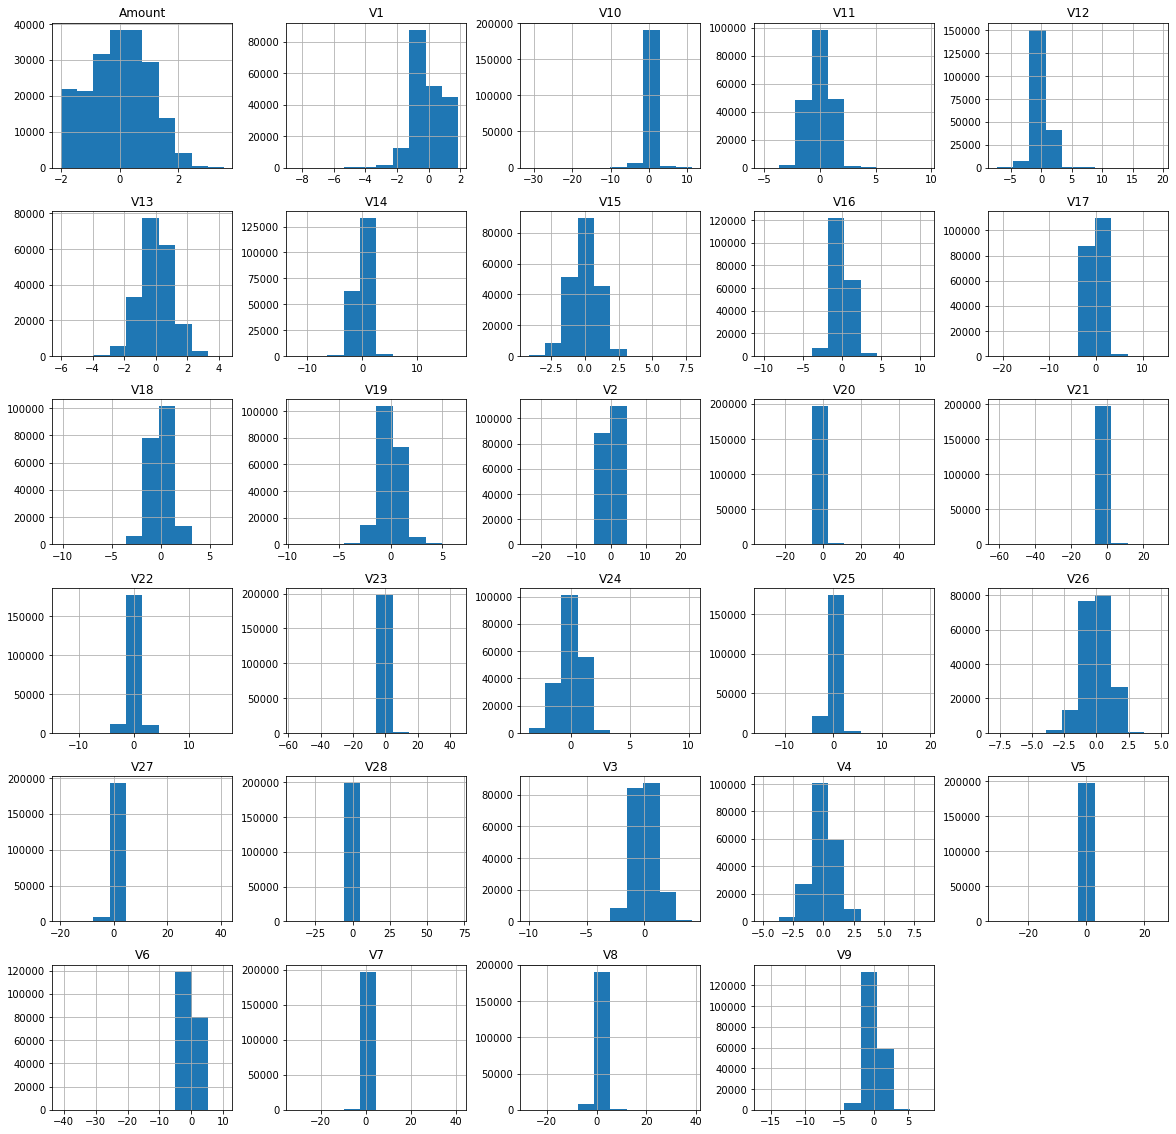

In [52]:
# plot the histogram of a variable from the dataset again to see the result 
X_train.hist(figsize = (20, 20))
plt.show()

In [53]:
X_train.skew(axis = 0, skipna = True)

V1       -0.218659
V2        0.348200
V3       -0.079351
V4        0.018358
V5       -0.346900
V6       -1.993752
V7        0.606021
V8        2.389016
V9       -0.060698
V10      -1.356770
V11       0.057088
V12       0.165318
V13       0.005926
V14       0.108003
V15       0.009912
V16       0.027145
V17      -0.825831
V18      -0.057166
V19       0.016302
V20      -0.481587
V21      -2.081382
V22      -0.019893
V23      -0.020900
V24       0.123275
V25       0.082718
V26      -0.023450
V27       1.326715
V28       1.207900
Amount    0.017888
dtype: float64

#### <font color = 'red'>Above results show that skewness in our data is between -2 to +2 which is acceptable limit. Hence we will move onto model building now.

In [54]:
# Lets see the distribution of values of all variables after using power transformer
X_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000,199364.00000
mean,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-8.47871,-23.69508,-10.01018,-5.01593,-30.91127,-40.95571,-31.61887,-27.20799,-16.19219,-31.36713,-5.13404,-7.31866,-6.03707,-12.32955,-4.16012,-10.16563,-21.27965,-10.21427,-9.32814,-31.80224,-61.51380,-13.26984,-56.18039,-3.55717,-14.58672,-7.74081,-19.82209,-38.89243,-2.01354
25%,-0.72336,-0.45307,-0.71165,-0.57099,-0.50826,-0.55764,-0.46392,-0.27591,-0.56251,-0.47699,-0.73488,-0.58607,-0.64642,-0.51763,-0.67111,-0.60312,-0.60583,-0.60804,-0.55494,-0.28141,-0.29763,-0.75365,-0.27403,-0.65611,-0.63433,-0.65004,-0.20064,-0.15300,-0.74020
50%,-0.24861,-0.04143,-0.02424,0.06241,-0.04195,-0.11731,0.02106,-0.05593,0.00635,-0.04618,0.01273,-0.01884,-0.00294,-0.02282,-0.00421,-0.00470,-0.11511,-0.02409,0.01633,-0.08568,-0.02286,-0.01056,-0.03105,-0.02637,-0.00623,-0.01857,-0.01663,0.04952,0.02735
75%,0.73509,0.47503,0.67529,0.58318,0.44716,0.40981,0.46294,0.25661,0.58249,0.45789,0.74737,0.61081,0.67236,0.48543,0.69114,0.56973,0.46026,0.58762,0.56894,0.17262,0.26912,0.71924,0.22895,0.70665,0.65888,0.57814,0.21451,0.25711,0.74769
max,1.86987,23.46034,4.13965,8.46989,25.45047,10.32125,41.21466,38.34119,7.59148,11.26231,9.54227,19.55475,4.34906,17.58796,7.94946,10.81229,13.79644,6.49538,6.57679,54.56933,29.45332,16.42005,45.24224,10.30227,19.13376,4.95326,41.21151,70.96579,3.56632


## Model Building
- Build different models on the imbalanced dataset and see the result

In [56]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.1, 0.5, 1, 2, 3, 4, 5, 10]  #--> list of values
cv_num = 3   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [21]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

The code for above points has been written in subsequent cells below

In [22]:
# Number of folds
cv_num = 3

# parameters 
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

# Logistic Regression
logreg = LogisticRegression()

model_logreg = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [23]:
# Fitting the model
model_logreg.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   12.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [24]:
pd.DataFrame(model_logreg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.115025,0.008551,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,9
1,2.104036,0.082886,0.053856,0.004887,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.968689,0.988828,0.976769,0.978095,0.008275,1
2,0.162902,0.002348,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,10
3,2.550513,0.144610,0.053521,0.001242,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.967168,0.988682,0.975851,0.977234,0.008838,2
4,0.165556,0.006358,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,11
5,2.494662,0.084393,0.071142,0.016814,1,l2,"{'C': 1, 'penalty': 'l2'}",0.966907,0.988655,0.975702,0.977088,0.008933,3
6,0.180849,0.000471,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,12
7,2.481361,0.156210,0.053855,0.000814,2,l2,"{'C': 2, 'penalty': 'l2'}",0.966767,0.988635,0.975629,0.977010,0.008981,4
8,0.202457,0.024847,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13
9,2.394261,0.154708,0.055850,0.002155,3,l2,"{'C': 3, 'penalty': 'l2'}",0.966722,0.988629,0.975599,0.976984,0.008997,5


In [25]:
print("AUC for Logistic Regression model : ", model_logreg.best_score_)
print("Best hyperparameters for Logistic Regression model: ", model_logreg.best_params_)

AUC for Logistic Regression model :  0.9780954890251324
Best hyperparameters for Logistic Regression model:  {'C': 0.1, 'penalty': 'l2'}


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

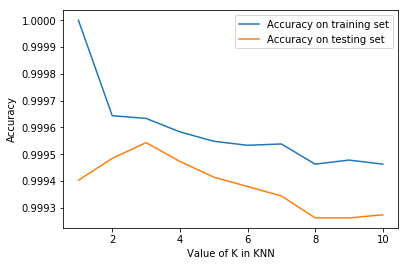

In [30]:
# KNN Model:

k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=3 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN n=3 on the testing dataset is :1.000


In [20]:
# Random Forest Model:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]    
}
# Create a base model
rf = RandomForestClassifier(random_state = 42)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc', 
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 46.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5),
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [22]:
# printing the best score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9810205337963803 using {'max_depth': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [23]:
# XGBoost Model:

# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = {'learning_rate': [0.02, 0.08, 0.1, 0.6, 0.8], 
             'subsample': [0.2, 0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier(max_depth=12, n_estimators=100)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring= 'roc_auc', cv = folds, 
                        verbose = 1, n_jobs = -1, return_train_score=True) 

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  8.1min finished
/opt/conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:23:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=12, min_child_weight=None,
                                     missing=n...traints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
              

In [24]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,64.067997,2.599964,0.590581,0.086446,0.02,0.2,"{'learning_rate': 0.02, 'subsample': 0.2}",0.911552,0.938439,0.933276,0.927756,0.011650,13,0.948958,0.933818,0.942472,0.941750,6.201844e-03
1,80.942443,3.847188,0.620954,0.037837,0.02,0.3,"{'learning_rate': 0.02, 'subsample': 0.3}",0.907597,0.938476,0.933460,0.926511,0.013530,14,0.944820,0.933902,0.940510,0.939744,4.489722e-03
2,122.939374,5.332830,0.511346,0.077198,0.02,0.6,"{'learning_rate': 0.02, 'subsample': 0.6}",0.899623,0.930060,0.933821,0.921168,0.015312,15,0.938659,0.931958,0.934377,0.934998,2.770842e-03
3,71.552241,3.248160,0.553625,0.074645,0.08,0.2,"{'learning_rate': 0.08, 'subsample': 0.2}",0.976028,0.996486,0.975852,0.982789,0.009686,5,0.997295,0.996775,0.996923,0.996998,2.189438e-04
4,92.333000,4.067112,0.585108,0.026123,0.08,0.3,"{'learning_rate': 0.08, 'subsample': 0.3}",0.970756,0.996037,0.983419,0.983404,0.010321,3,0.998660,0.998627,0.998875,0.998721,1.100805e-04
5,143.727818,6.937616,0.583661,0.037189,0.08,0.6,"{'learning_rate': 0.08, 'subsample': 0.6}",0.986924,0.996435,0.976063,0.986474,0.008323,2,0.999509,0.999594,0.999744,0.999616,9.739475e-05
6,67.319644,2.355546,0.495887,0.035320,0.1,0.2,"{'learning_rate': 0.1, 'subsample': 0.2}",0.973632,0.996351,0.974860,0.981614,0.010432,6,0.997096,0.997050,0.997725,0.997290,3.076713e-04
7,88.266962,3.805536,0.545761,0.029651,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.973993,0.995539,0.979219,0.982917,0.009177,4,0.999167,0.999545,0.999422,0.999378,1.571605e-04
8,137.714558,4.416430,0.659094,0.017607,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.986557,0.996194,0.979560,0.987437,0.006820,1,0.999954,0.999950,0.999966,0.999957,6.838493e-06
9,53.657631,3.138828,0.684977,0.044584,0.6,0.2,"{'learning_rate': 0.6, 'subsample': 0.2}",0.951902,0.990706,0.962746,0.968451,0.016347,9,0.999085,0.999169,0.999887,0.999380,3.596475e-04


In [25]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,64.067997,2.599964,0.590581,0.086446,0.02,0.2,"{'learning_rate': 0.02, 'subsample': 0.2}",0.911552,0.938439,0.933276,0.927756,0.011650,13,0.948958,0.933818,0.942472,0.941750,0.006202
1,80.942443,3.847188,0.620954,0.037837,0.02,0.3,"{'learning_rate': 0.02, 'subsample': 0.3}",0.907597,0.938476,0.933460,0.926511,0.013530,14,0.944820,0.933902,0.940510,0.939744,0.004490
2,122.939374,5.332830,0.511346,0.077198,0.02,0.6,"{'learning_rate': 0.02, 'subsample': 0.6}",0.899623,0.930060,0.933821,0.921168,0.015312,15,0.938659,0.931958,0.934377,0.934998,0.002771
3,71.552241,3.248160,0.553625,0.074645,0.08,0.2,"{'learning_rate': 0.08, 'subsample': 0.2}",0.976028,0.996486,0.975852,0.982789,0.009686,5,0.997295,0.996775,0.996923,0.996998,0.000219
4,92.333000,4.067112,0.585108,0.026123,0.08,0.3,"{'learning_rate': 0.08, 'subsample': 0.3}",0.970756,0.996037,0.983419,0.983404,0.010321,3,0.998660,0.998627,0.998875,0.998721,0.000110


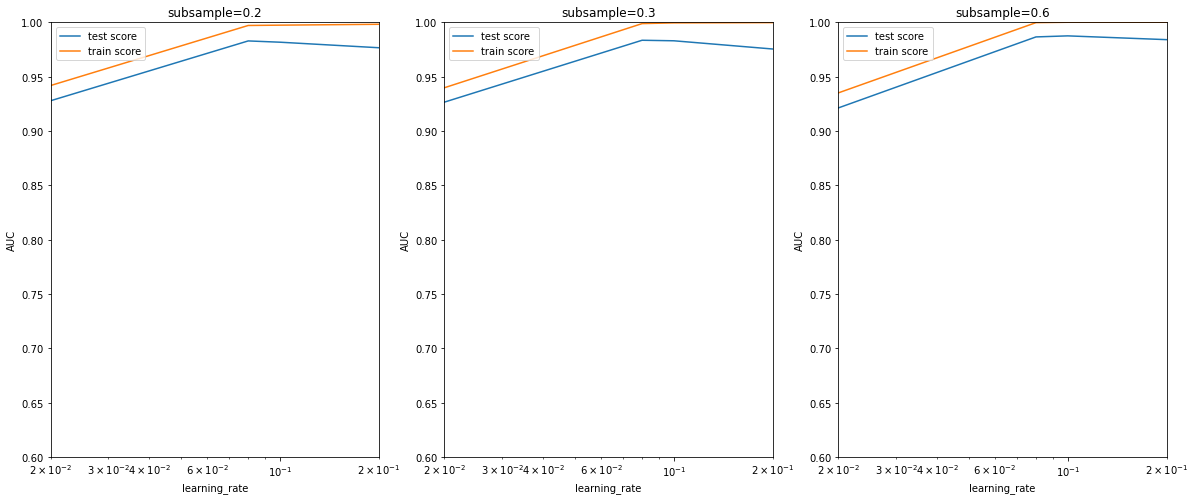

In [26]:
# # plotting
plt.figure(figsize=(20,8))

param_grid = {'learning_rate': [0.02, 0.08, 0.1, 0.6, 0.8], 
             'subsample': [0.2, 0.3, 0.6]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.xlim([0.02, 0.2])
    plt.ylim([0.6, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [27]:
# printing the best score and hyperparameters
print('We can get best score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get best score of 0.9874370937425575 using {'learning_rate': 0.1, 'subsample': 0.6}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [63]:
#Choosing XGBoost model which has given best auc score so far

clf = XGBClassifier(params = {'learning_rate': 0.1, 'max_depth': 12, 
                    'n_estimators':100,'subsample':0.6, 
                    'objective':'binary:logistic'})                  #initialise the model with optimum hyperparameters  
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])

print('AUC Score = ', auc) #print the evaluation score on the X_test by choosing the best evaluation metric

/opt/conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:26] WARNING: ../src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:06:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Score =  0.9741683473731073


In [70]:
# Lets check the F1 Score as it is a harmonic mean of precision and recall which is a good measure in case of imbalanced dataset
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
print('F1 score = ', f1_score(y_test, y_pred))

F1 score =  0.8529411764705881


#### <font color = 'red'>We got AUC of 0.97 and F1 score of 0.85 with XGBoost model without handling imbalanced dataset

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


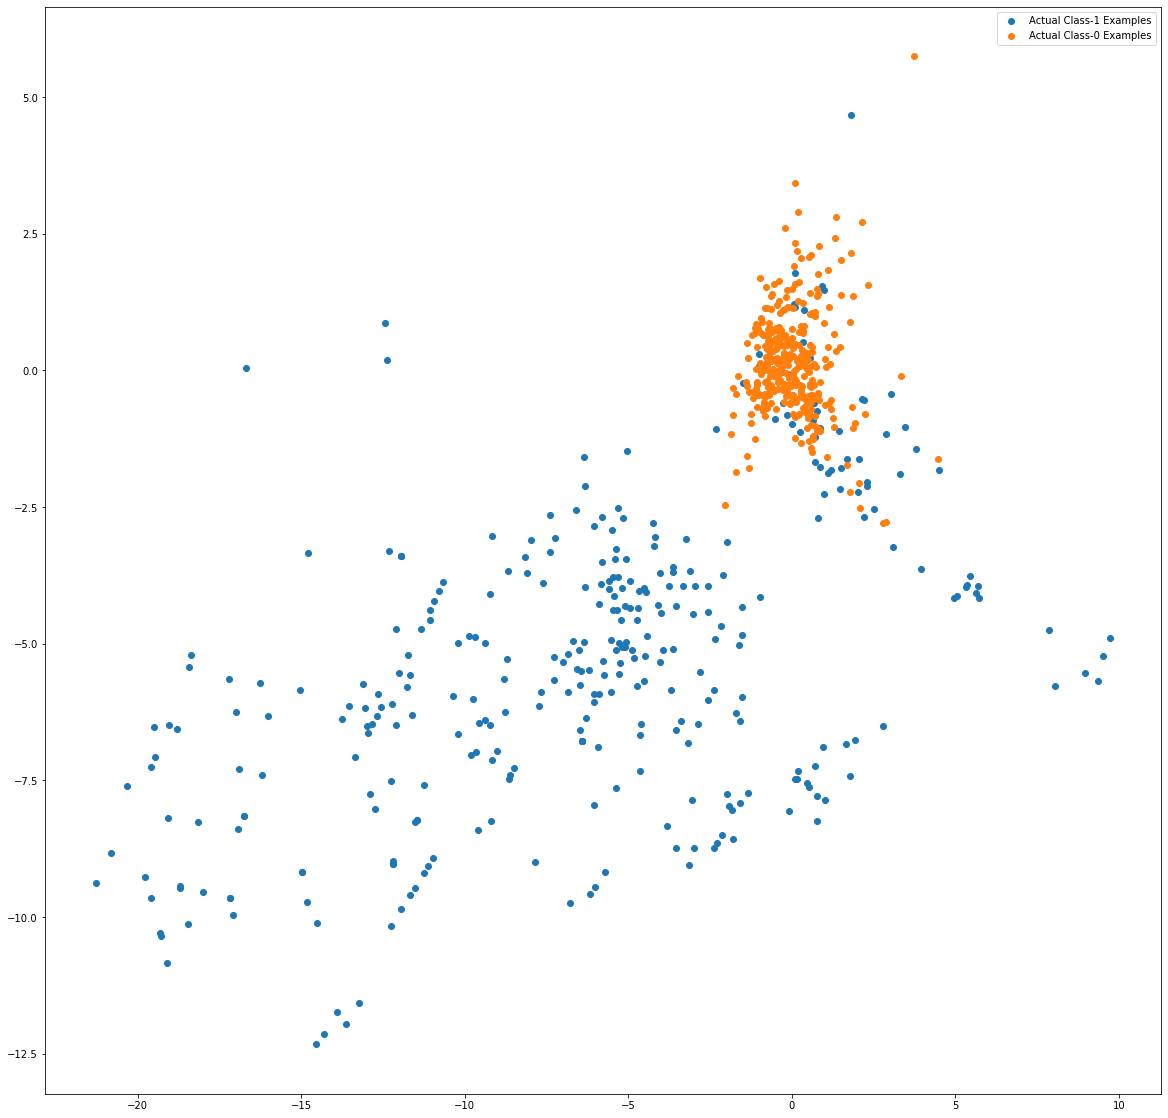

In [71]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [57]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.1, 0.5, 1, 2, 3, 4, 5, 10]  #--> list of values
cv_num = 3  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [58]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

# Sample distribution before using random oversampling
print(Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority',random_state=0)
# fit and apply the transform
X_train_ros, y_train_ros = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train_ros))

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


Counter({0: 199020, 1: 344})
Counter({0: 199020, 1: 199020})


The code for above points has been written in subsequent cells below

In [58]:
# Number of folds
cv_num = 3

# parameters 
params ={'C': num_C, 'penalty': ['l1', 'l2']}

folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

# Logistic Regression
logreg = LogisticRegression()

model_logreg = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fitting the model on random oversampled data
model_logreg.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   10.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [59]:
pd.DataFrame(model_logreg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.122331,0.006580,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,9
1,2.967218,0.242579,0.064854,0.011075,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.988302,0.988601,0.988161,0.988355,0.000183,8
2,0.128285,0.014813,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,10
3,2.719502,0.080106,0.068849,0.014300,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.988321,0.988613,0.988178,0.988371,0.000181,7
4,0.105242,0.013234,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,11
5,2.539069,0.347567,0.064728,0.015519,1,l2,"{'C': 1, 'penalty': 'l2'}",0.988323,0.988615,0.988180,0.988373,0.000181,6
6,0.094312,0.005043,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,12
7,2.556369,0.149818,0.063501,0.011168,2,l2,"{'C': 2, 'penalty': 'l2'}",0.988325,0.988616,0.988181,0.988374,0.000181,5
8,0.104389,0.003195,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13
9,2.423002,0.281658,0.054875,0.000620,3,l2,"{'C': 3, 'penalty': 'l2'}",0.988326,0.988616,0.988181,0.988374,0.000181,4


In [60]:
print("AUC for Logistic Regression model : ", model_logreg.best_score_)
print("Best hyperparameters for Logistic Regression model: ", model_logreg.best_params_)

AUC for Logistic Regression model :  0.9883743396607804
Best hyperparameters for Logistic Regression model:  {'C': 10, 'penalty': 'l2'}


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [28]:
# Decision tree Model:

tree_model = DecisionTreeClassifier()

# creating a StratifiedKFold object with 3 splits 
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

tree_param_grid = { 
    'max_depth': [i for i in range(5,20,2)],
    'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5]
}

model_cv = GridSearchCV(tree_model, tree_param_grid, cv=folds, scoring='roc_auc', n_jobs=-1, verbose=2)
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  7.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15, 20, 50, 100]},
             scoring='roc_auc', verbose=2)

In [29]:
# printing the optimal score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9997981667678407 corresponding to hyperparameters {'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [24]:
# Random Forest Model:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]    
}
# Create a base model
rf = RandomForestClassifier(random_state = 42)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc', 
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 46.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5),
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [25]:
# printing the best score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9999617875100806 using {'max_depth': 17, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [27]:
# XGBoost Model:

# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = {'learning_rate': [0.02, 0.08, 0.1, 0.6, 0.8], 
             'subsample': [0.2, 0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier(max_depth=17, n_estimators=300)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring= 'roc_auc', cv = folds, 
                        verbose = 1, n_jobs = -1, return_train_score=True) 

# fit the model
model_cv.fit(X_train_ros, y_train_ros)  

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 48.8min finished
/opt/conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:56:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=17, min_child_weight=None,
                                     missing=n...traints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
              

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,718.602516,1.642569,2.550849,0.084776,0.02,0.2,"{'learning_rate': 0.02, 'subsample': 0.2}",0.999948,0.999978,0.999970,0.999965,0.000013,15,0.999987,0.999980,0.999973,0.999980,5.470969e-06
1,799.401030,3.934318,2.453492,0.051526,0.02,0.3,"{'learning_rate': 0.02, 'subsample': 0.3}",0.999951,0.999983,0.999986,0.999973,0.000016,14,0.999994,0.999989,0.999984,0.999989,3.835828e-06
2,1011.319934,32.115269,2.606228,0.293935,0.02,0.6,"{'learning_rate': 0.02, 'subsample': 0.6}",0.999954,0.999988,0.999997,0.999980,0.000019,12,0.999997,0.999995,0.999993,0.999995,1.900655e-06
3,491.336349,10.587722,2.208656,0.117221,0.08,0.2,"{'learning_rate': 0.08, 'subsample': 0.2}",0.999979,0.999992,1.000000,0.999991,0.000009,8,1.000000,1.000000,1.000000,1.000000,3.098248e-08
4,567.910631,9.208738,2.348816,0.333533,0.08,0.3,"{'learning_rate': 0.08, 'subsample': 0.3}",0.999981,0.999997,1.000000,0.999993,0.000008,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,730.954124,16.734068,2.617644,0.262069,0.08,0.6,"{'learning_rate': 0.08, 'subsample': 0.6}",0.999977,0.999997,1.000000,0.999992,0.000010,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,483.324368,12.676591,2.148992,0.087072,0.1,0.2,"{'learning_rate': 0.1, 'subsample': 0.2}",0.999978,0.999988,1.000000,0.999989,0.000009,10,1.000000,1.000000,1.000000,1.000000,9.972315e-09
7,577.608948,5.877919,2.331155,0.129596,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999980,0.999997,1.000000,0.999992,0.000009,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,740.392291,7.369292,2.488271,0.114032,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.999975,0.999998,1.000000,0.999991,0.000011,7,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,232.252309,18.898175,1.439710,0.242459,0.6,0.2,"{'learning_rate': 0.6, 'subsample': 0.2}",0.999972,0.999997,1.000000,0.999990,0.000012,9,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [31]:
# printing the best score and hyperparameters
print('We can get best score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get best score of 0.9999928708934253 using {'learning_rate': 0.8, 'subsample': 0.6}


In [37]:
# Lets check the F1 Score as it is a harmonic mean of precision and recall which is a good measure in case of imbalanced dataset
from sklearn.metrics import f1_score
y_pred = model_cv.predict(X_test)
print('F1 score = ', f1_score(y_test, y_pred))

F1 score =  0.8671328671328672


### Print the class distribution after applying SMOTE 

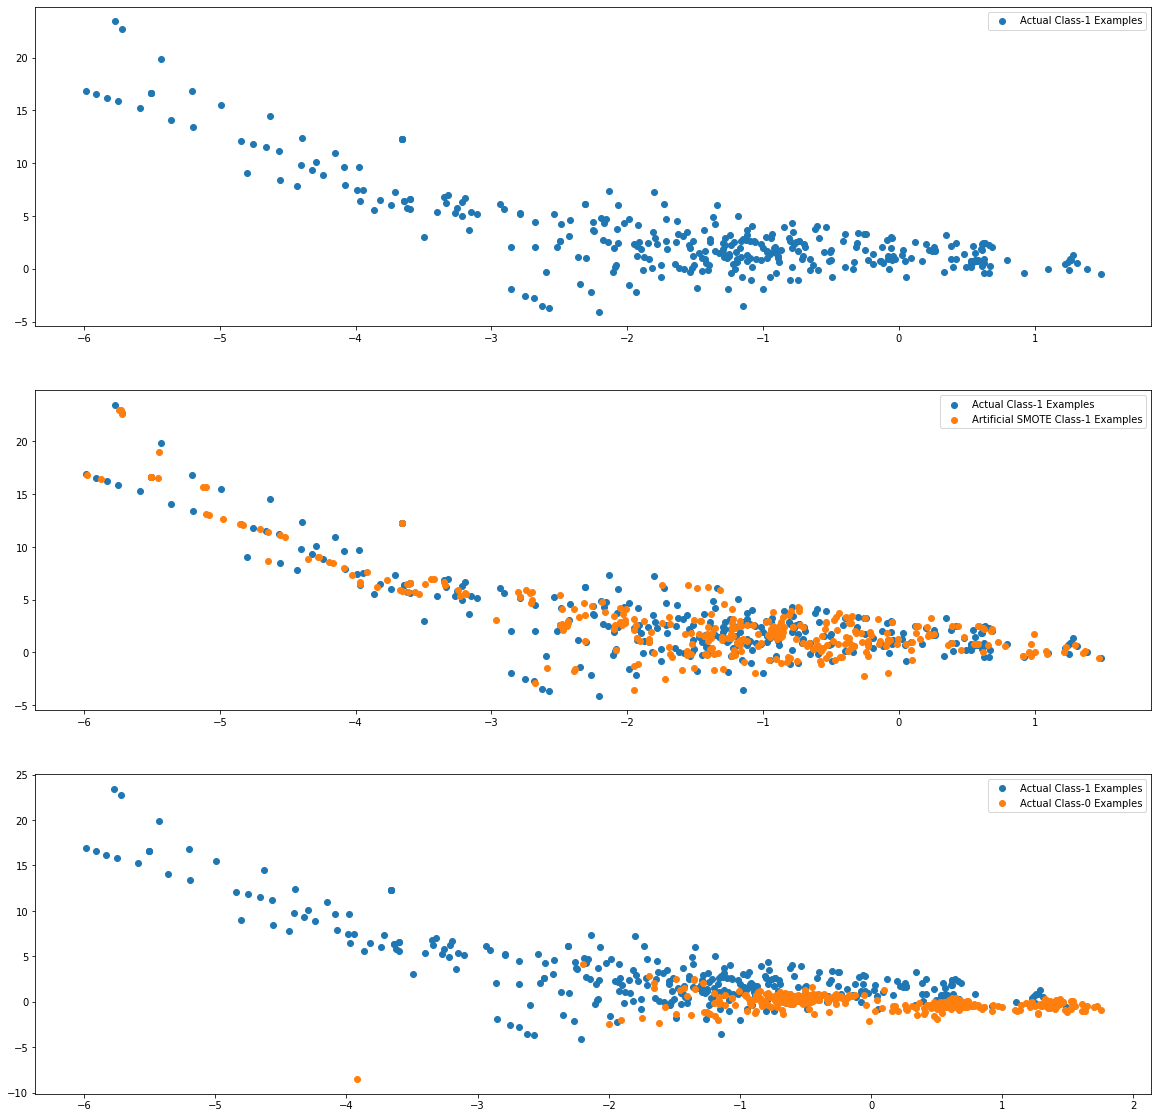

In [59]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


The code for above points has been written in subsequent cells below

In [29]:
# Number of folds
cv_num = 3

# parameters 
params ={'C': num_C, 'penalty': ['l1', 'l2']}

folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

# Logistic Regression
logreg = LogisticRegression()

model_logreg = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fitting the model on random oversampled data
model_logreg.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    9.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [30]:
pd.DataFrame(model_logreg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142799,0.014431,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,9
1,2.489314,0.023434,0.064965,0.001542,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.990306,0.990251,0.990643,0.990400,0.000173,8
2,0.141749,0.003239,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,10
3,2.485216,0.036003,0.078581,0.013523,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.990316,0.990259,0.990649,0.990408,0.000172,7
4,0.113969,0.014774,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,11
5,2.315541,0.203877,0.063897,0.003665,1,l2,"{'C': 1, 'penalty': 'l2'}",0.990318,0.990260,0.990650,0.990409,0.000172,6
6,0.120474,0.017111,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,12
7,2.263498,0.039785,0.070401,0.008476,2,l2,"{'C': 2, 'penalty': 'l2'}",0.990318,0.990261,0.990651,0.990410,0.000172,5
8,0.099534,0.014376,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13
9,2.115649,0.111527,0.084873,0.016800,3,l2,"{'C': 3, 'penalty': 'l2'}",0.990318,0.990261,0.990651,0.990410,0.000172,4


In [31]:
print("AUC for Logistic Regression model : ", model_logreg.best_score_)
print("Best hyperparameters for Logistic Regression model: ", model_logreg.best_params_)

AUC for Logistic Regression model :  0.9904103265482321
Best hyperparameters for Logistic Regression model:  {'C': 10, 'penalty': 'l2'}


##### Build models on other algorithms to see the better performing on SMOTE

In [36]:
# SVM Model:

# creating a StratifiedKFold object with 3 splits 
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs= -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 109.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [37]:
# printing the optimal score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9999759832373686 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [38]:
# Decision tree Model:

tree_model = DecisionTreeClassifier()

# creating a StratifiedKFold object with 3 splits 
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

tree_param_grid = { 
    'max_depth': [i for i in range(5,20,2)],
    'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5]
}

model_cv = GridSearchCV(tree_model, tree_param_grid, cv=folds, scoring='roc_auc', n_jobs=-1, verbose=2)
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 18.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15, 20, 50, 100]},
             scoring='roc_auc', verbose=2)

In [40]:
# printing the optimal score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.998721252300275 corresponding to hyperparameters {'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 100}


In [28]:
# Random Forest Model:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]    
}
# Create a base model
rf = RandomForestClassifier(random_state = 42)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc', 
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 92.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5),
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [29]:
# printing the best score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9998801961235014 using {'max_depth': 17, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [24]:
# XGBoost Model:

# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = {'learning_rate': [0.02, 0.08, 0.1, 0.6, 0.8], 
             'subsample': [0.2, 0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier(max_depth=17, n_estimators=300)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring= 'roc_auc', cv = folds, 
                        verbose = 1, n_jobs = -1, return_train_score=True) 

# fit the model
model_cv.fit(X_train_smote, y_train_smote)  

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 77.2min finished


[10:36:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=17, min_child_weight=None,
                                     missing=n...traints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
              

In [25]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1177.860470,3.400917,3.478622,0.247560,0.02,0.2,"{'learning_rate': 0.02, 'subsample': 0.2}",0.999942,0.999973,0.999969,0.999961,0.000014,15,0.999985,0.999980,0.999976,0.999980,3.529441e-06
1,1378.152842,1.694811,3.581659,0.245618,0.02,0.3,"{'learning_rate': 0.02, 'subsample': 0.3}",0.999951,0.999984,0.999981,0.999972,0.000015,14,0.999993,0.999991,0.999983,0.999989,4.128443e-06
2,1882.016847,11.446303,4.501649,0.411322,0.02,0.6,"{'learning_rate': 0.02, 'subsample': 0.6}",0.999953,0.999988,0.999995,0.999979,0.000018,13,0.999998,0.999995,0.999993,0.999996,2.064711e-06
3,791.856436,8.987737,3.336928,0.315314,0.08,0.2,"{'learning_rate': 0.08, 'subsample': 0.2}",0.999979,0.999990,0.999998,0.999989,0.000008,6,1.000000,1.000000,1.000000,1.000000,8.341396e-08
4,912.989831,9.602369,3.193966,0.238589,0.08,0.3,"{'learning_rate': 0.08, 'subsample': 0.3}",0.999972,0.999995,1.000000,0.999989,0.000012,7,1.000000,1.000000,1.000000,1.000000,9.519936e-09
5,1178.946754,10.107348,3.388044,0.236084,0.08,0.6,"{'learning_rate': 0.08, 'subsample': 0.6}",0.999980,0.999996,1.000000,0.999992,0.000008,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,692.414218,4.655505,2.916038,0.188335,0.1,0.2,"{'learning_rate': 0.1, 'subsample': 0.2}",0.999979,0.999992,0.999998,0.999990,0.000008,4,1.000000,1.000000,1.000000,1.000000,9.466708e-08
7,837.520087,46.811392,3.438115,0.700801,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999974,0.999995,1.000000,0.999990,0.000011,5,1.000000,1.000000,1.000000,1.000000,1.848284e-09
8,1157.048686,5.131225,3.075886,0.298188,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.999976,0.999997,1.000000,0.999991,0.000011,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,349.020126,48.106161,1.905725,0.417250,0.6,0.2,"{'learning_rate': 0.6, 'subsample': 0.2}",0.999966,0.999994,0.999999,0.999986,0.000014,11,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [26]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1177.860470,3.400917,3.478622,0.247560,0.02,0.2,"{'learning_rate': 0.02, 'subsample': 0.2}",0.999942,0.999973,0.999969,0.999961,0.000014,15,0.999985,0.999980,0.999976,0.999980,3.529441e-06
1,1378.152842,1.694811,3.581659,0.245618,0.02,0.3,"{'learning_rate': 0.02, 'subsample': 0.3}",0.999951,0.999984,0.999981,0.999972,0.000015,14,0.999993,0.999991,0.999983,0.999989,4.128443e-06
2,1882.016847,11.446303,4.501649,0.411322,0.02,0.6,"{'learning_rate': 0.02, 'subsample': 0.6}",0.999953,0.999988,0.999995,0.999979,0.000018,13,0.999998,0.999995,0.999993,0.999996,2.064711e-06
3,791.856436,8.987737,3.336928,0.315314,0.08,0.2,"{'learning_rate': 0.08, 'subsample': 0.2}",0.999979,0.999990,0.999998,0.999989,0.000008,6,1.000000,1.000000,1.000000,1.000000,8.341396e-08
4,912.989831,9.602369,3.193966,0.238589,0.08,0.3,"{'learning_rate': 0.08, 'subsample': 0.3}",0.999972,0.999995,1.000000,0.999989,0.000012,7,1.000000,1.000000,1.000000,1.000000,9.519936e-09


In [28]:
# printing the best score and hyperparameters
print('We can get best score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get best score of 0.999992370627834 using {'learning_rate': 0.6, 'subsample': 0.6}


### Print the class distribution after applying ADASYN

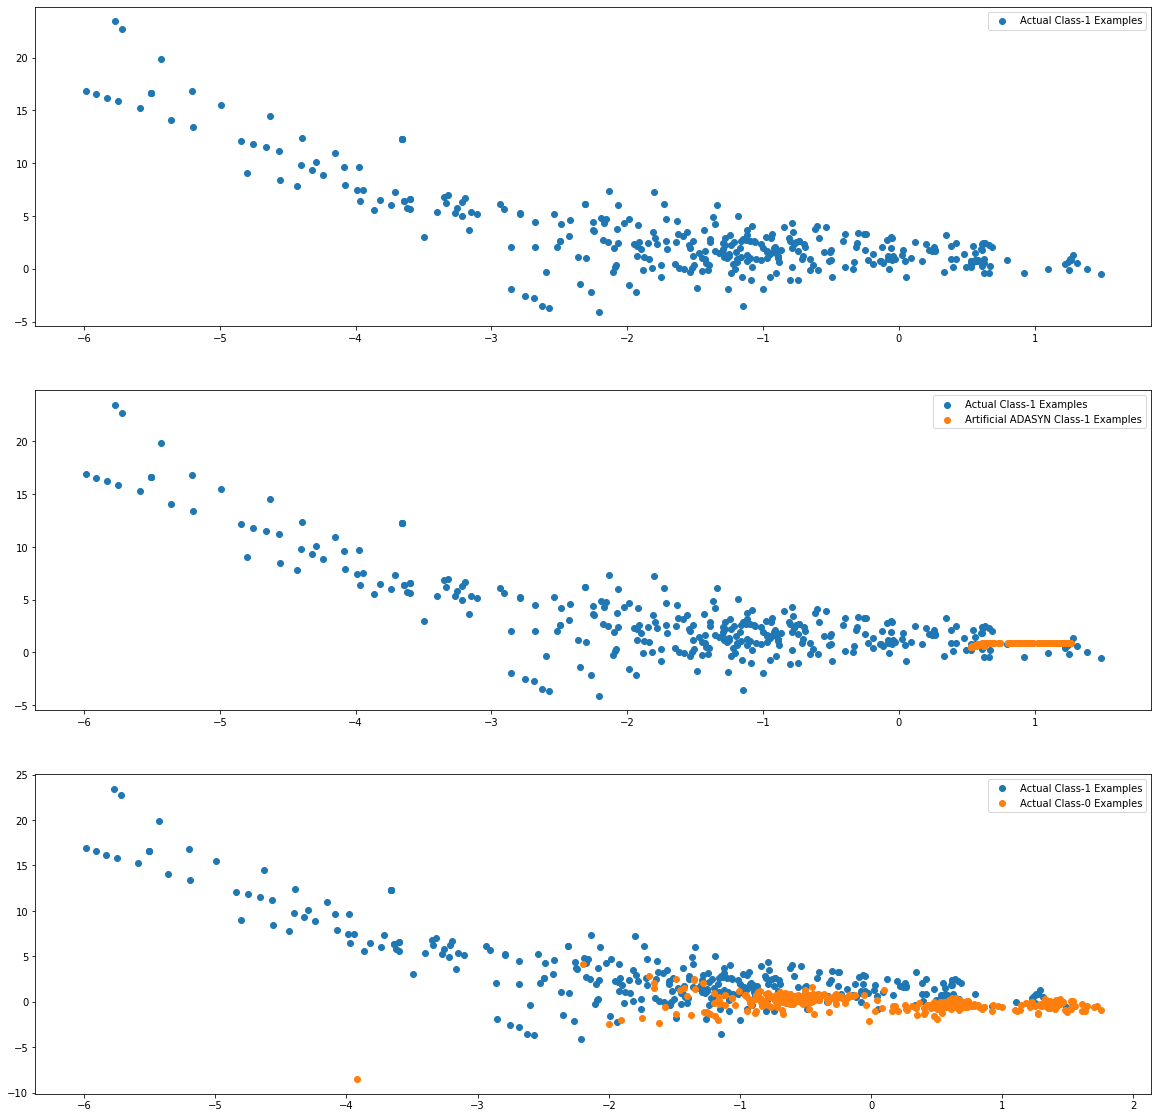

In [24]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [25]:
Counter(y_train)

Counter({0: 199020, 1: 344})

In [26]:
Counter(y_train_adasyn)

Counter({0: 199020, 1: 198976})

In [27]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


The code for above points has been written in subsequent cells below

In [45]:
# Number of folds
cv_num = 3

# parameters 
params ={'C': num_C, 'penalty': ['l1', 'l2']}

folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

# Logistic Regression
logreg = LogisticRegression()

model_logreg = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fitting the model on random oversampled data
model_logreg.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   11.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [46]:
pd.DataFrame(model_logreg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.158829,0.005361,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,9
1,3.218177,0.130290,0.095751,0.002331,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.966869,0.966927,0.966594,0.966797,0.000145,8
2,0.182069,0.019031,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,10
3,2.931543,0.072181,0.088429,0.006111,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.966874,0.966934,0.966590,0.966799,0.000150,7
4,0.138494,0.003299,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,11
5,2.921289,0.083993,0.088127,0.006064,1,l2,"{'C': 1, 'penalty': 'l2'}",0.966874,0.966935,0.966589,0.966799,0.000151,6
6,0.161717,0.014390,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,12
7,2.996822,0.145667,0.090949,0.007533,2,l2,"{'C': 2, 'penalty': 'l2'}",0.966875,0.966935,0.966589,0.966800,0.000151,5
8,0.138318,0.012732,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13
9,2.953556,0.026654,0.092649,0.007435,3,l2,"{'C': 3, 'penalty': 'l2'}",0.966875,0.966935,0.966589,0.966800,0.000151,2


In [47]:
print("AUC for Logistic Regression model : ", model_logreg.best_score_)
print("Best hyperparameters for Logistic Regression model: ", model_logreg.best_params_)

AUC for Logistic Regression model :  0.9667995844946599
Best hyperparameters for Logistic Regression model:  {'C': 10, 'penalty': 'l2'}


##### Build models on other algorithms to see the better performing on ADASYN

In [30]:
# Decision tree Model:

tree_model = DecisionTreeClassifier()

# creating a StratifiedKFold object with 3 splits 
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 4)

tree_param_grid = { 
    'max_depth': [i for i in range(5,20,2)],
    'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5]
}

model_cv = GridSearchCV(tree_model, tree_param_grid, cv=folds, scoring='roc_auc', n_jobs=-1, verbose=2)
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 14.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15, 20, 50, 100]},
             scoring='roc_auc', verbose=2)

In [32]:
# printing the optimal score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9969944380053017 corresponding to hyperparameters {'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 100}


In [33]:
# Random Forest Model:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]    
}
# Create a base model
rf = RandomForestClassifier(random_state = 42)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc', 
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 76.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5),
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [34]:
# printing the best score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.999875342348382 using {'max_depth': 17, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [35]:
# XGBoost Model:

# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = {'learning_rate': [0.02, 0.08, 0.1, 0.6, 0.8], 
             'subsample': [0.2, 0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier(max_depth=17, n_estimators=300)

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring= 'roc_auc', cv = folds, 
                        verbose = 1, n_jobs = -1, return_train_score=True) 

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)  

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 80.9min finished


[17:18:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=17, min_child_weight=None,
                                     missing=n...traints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
              

In [36]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1262.234758,7.903149,4.525445,0.224556,0.02,0.2,"{'learning_rate': 0.02, 'subsample': 0.2}",0.999940,0.999977,0.999958,0.999958,0.000015,15,0.999992,0.999990,0.999979,0.999987,5.339591e-06
1,1475.034318,6.427402,4.833253,0.633855,0.02,0.3,"{'learning_rate': 0.02, 'subsample': 0.3}",0.999950,0.999980,0.999986,0.999972,0.000016,14,0.999997,0.999995,0.999991,0.999994,2.702606e-06
2,2054.193349,11.045143,5.548401,0.119830,0.02,0.6,"{'learning_rate': 0.02, 'subsample': 0.6}",0.999960,0.999988,0.999994,0.999981,0.000015,12,0.999999,0.999999,0.999998,0.999999,8.166557e-07
3,795.932818,7.537060,3.204403,0.292014,0.08,0.2,"{'learning_rate': 0.08, 'subsample': 0.2}",0.999968,0.999991,0.999999,0.999986,0.000013,7,1.000000,1.000000,1.000000,1.000000,3.261400e-09
4,947.483828,21.567925,3.403400,0.191583,0.08,0.3,"{'learning_rate': 0.08, 'subsample': 0.3}",0.999969,0.999997,1.000000,0.999989,0.000014,2,1.000000,1.000000,1.000000,1.000000,9.657139e-11
5,1296.704900,24.414702,3.780576,0.139421,0.08,0.6,"{'learning_rate': 0.08, 'subsample': 0.6}",0.999968,0.999999,1.000000,0.999989,0.000015,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,737.586444,8.494012,3.009271,0.074817,0.1,0.2,"{'learning_rate': 0.1, 'subsample': 0.2}",0.999974,0.999992,0.999997,0.999988,0.000010,4,1.000000,1.000000,1.000000,1.000000,1.397146e-09
7,853.229182,11.019955,3.267145,0.049142,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999959,0.999998,0.999999,0.999985,0.000019,8,1.000000,1.000000,1.000000,1.000000,2.678436e-11
8,1177.116300,19.460930,3.530234,0.154551,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.999966,0.999998,1.000000,0.999988,0.000015,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,326.459009,5.874231,1.562684,0.086211,0.6,0.2,"{'learning_rate': 0.6, 'subsample': 0.2}",0.999981,0.999984,0.999993,0.999986,0.000005,6,1.000000,1.000000,1.000000,1.000000,3.722996e-09


In [39]:
# printing the best score and hyperparameters
print('We can get best score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get best score of 0.9999890266749022 using {'learning_rate': 0.08, 'subsample': 0.6}


#### <FONT COLOR='RED'> XGBoost model with SMOTE oversampling technique gives higher AUC than other models hence choosing the same.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [60]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(params = {'learning_rate': 0.6, 'max_depth': 17, 
                    'n_estimators':300,'subsample':0.6, 
                    'objective':'binary:logistic'})               #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote) # fit on the balanced dataset

y_prob=clf.predict_proba(X_test)
y_pred=clf.predict(X_test)

print('AUC-ROC', roc_auc_score(y_test, y_prob[:,1]))
print("Recall = ",recall_score(y_test,y_pred))
print('F1 score = ', f1_score(y_test, y_pred))    #print the evaluation score on the X_test by choosing the best evaluation metric

[14:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC-ROC 0.9776352499988118
Recall =  0.831081081081081
F1 score =  0.7961165048543689


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


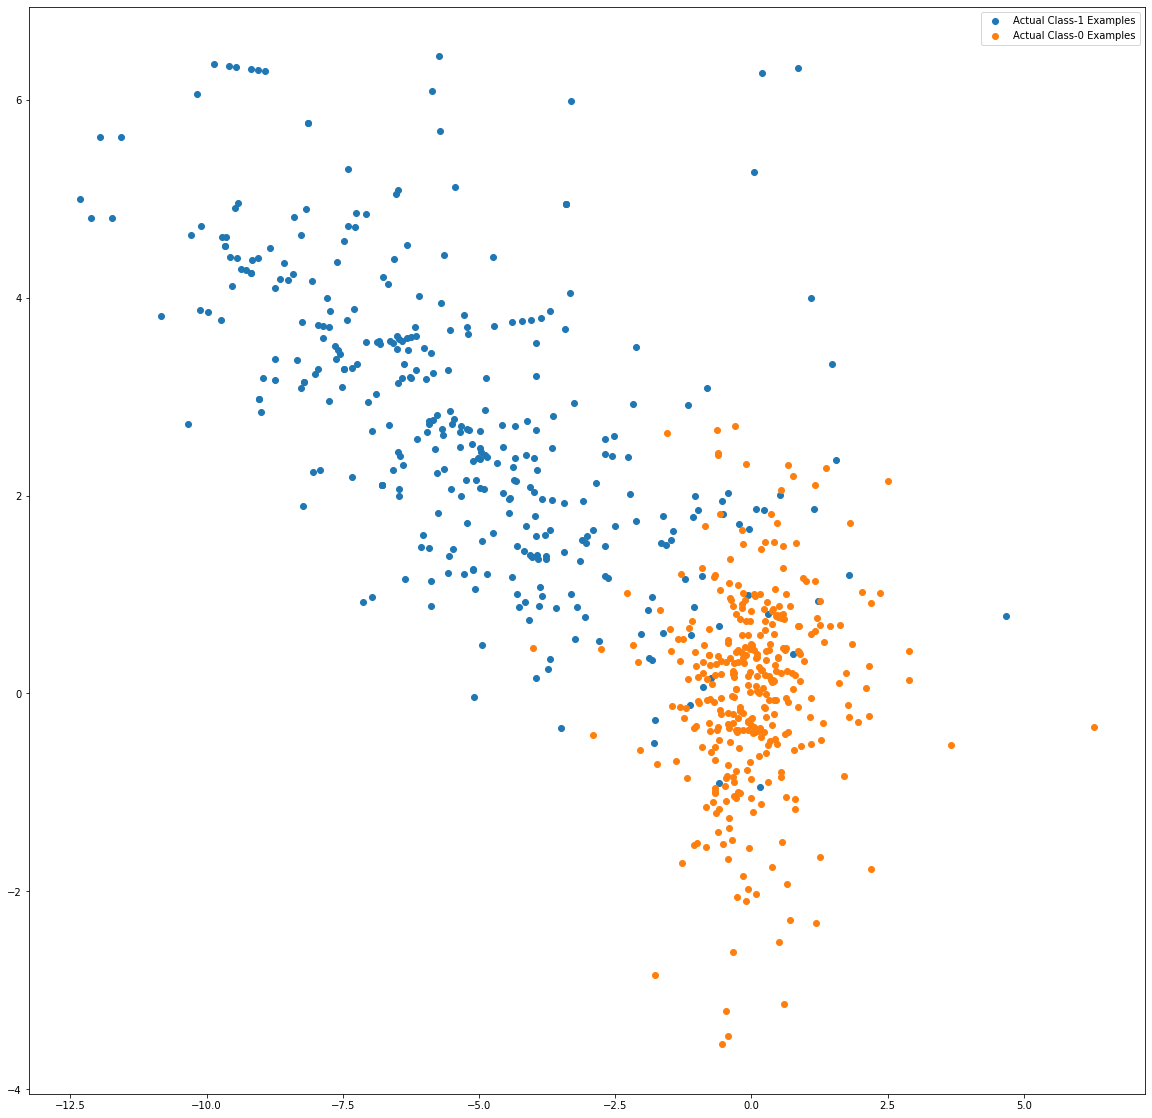

In [61]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

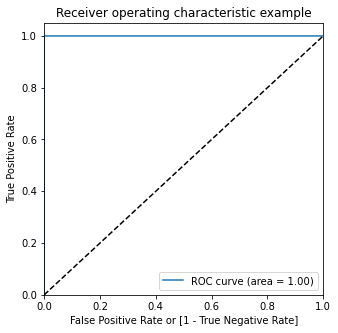

In [62]:
#### Print the FPR,TPR & select the best threshold from the roc curve

y_train_pred = clf.predict_proba(X_train_smote)[:,1]
y_train_pred_final = pd.DataFrame({'Fraud':y_train_smote.values, 'Fraud_Prob':y_train_pred})

# Creating new column 'predicted' with 1 if Fraud_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

#### Finding Optimal Cutoff Point

In [63]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,3.449552e-09,0,1,0,0,0,0,0,0,0,0,0
1,0,5.635919e-06,0,1,0,0,0,0,0,0,0,0,0
2,0,1.626312e-07,0,1,0,0,0,0,0,0,0,0,0
3,0,3.308658e-07,0,1,0,0,0,0,0,0,0,0,0
4,0,1.622011e-05,0,1,0,0,0,0,0,0,0,0,0


### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [64]:

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi     speci
0.0   0.0  0.500000    1.0  0.000000
0.1   0.1  0.999879    1.0  0.999759
0.2   0.2  0.999972    1.0  0.999945
0.3   0.3  0.999995    1.0  0.999990
0.4   0.4  0.999997    1.0  0.999995
0.5   0.5  1.000000    1.0  1.000000
0.6   0.6  1.000000    1.0  1.000000
0.7   0.7  1.000000    1.0  1.000000
0.8   0.8  1.000000    1.0  1.000000
0.9   0.9  1.000000    1.0  1.000000


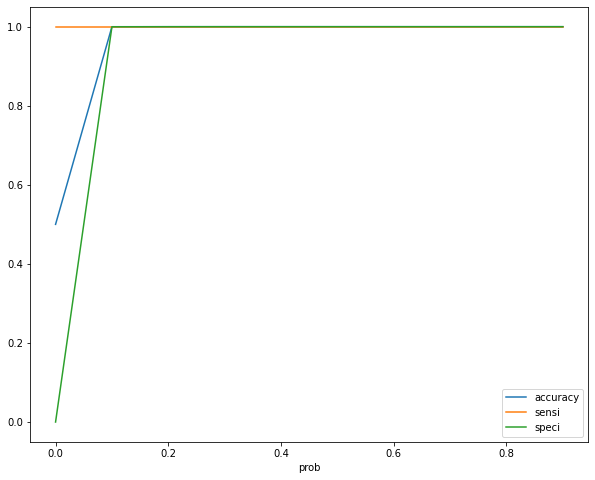

In [65]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,8))
plt.show()

#### <font color = 'red'>We want to keep the sensitivity high i.e. predict fraud cases accurately than non-fraud cases, so based on the graph above, we will choose `0.2` as threshold

In [66]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,3.449552e-09,0,1,0,0,0,0,0,0,0,0,0
1,0,5.635919e-06,0,1,0,0,0,0,0,0,0,0,0
2,0,1.626312e-07,0,1,0,0,0,0,0,0,0,0,0
3,0,3.308658e-07,0,1,0,0,0,0,0,0,0,0,0
4,0,1.622011e-05,0,1,0,0,0,0,0,0,0,0,0


In [67]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print("CONFUSION MATRIX:")
print(confusion2)

CONFUSION MATRIX:
[[199009     11]
 [     0 199020]]


#### <font color = 'red'>Above confusion matrix shows that our model has predicted all fraud cases from training set correctly and meanwhile 11 of non-fraud cases has been predicted as fraud.

In [68]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, clf.predict_proba(X_train_smote)[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, clf.predict_proba(X_train_smote)[:, 1], pos_label=2)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
1.9999999
